# Distribution Plots

The plots that enable us to visualize the distribution of a dataset are as follows:

* histplot
* jointplot
* pairplot
* rugplot
* kdeplot

In [ ]:
import seaborn as sns
%matplotlib inline

## Seaborn Built-in Dataset

In [ ]:
df = sns.load_dataset('tips')

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## histplot

The histplot illustrates the distribution of a set of univariate observations.

<Axes: xlabel='total_bill', ylabel='Count'>

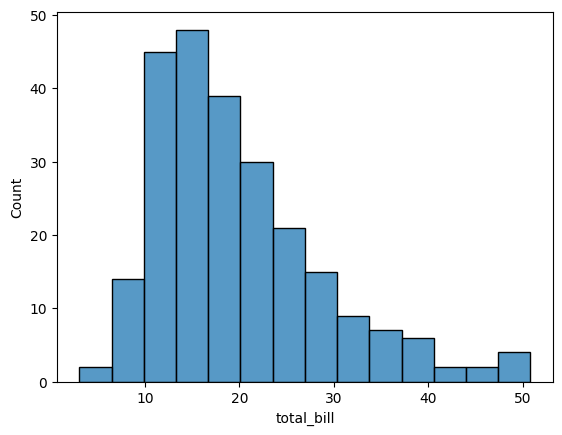

In [ ]:
sns.histplot(df['total_bill'])

To remove the kde layer and just have the histogram use:

<Axes: xlabel='total_bill', ylabel='Count'>

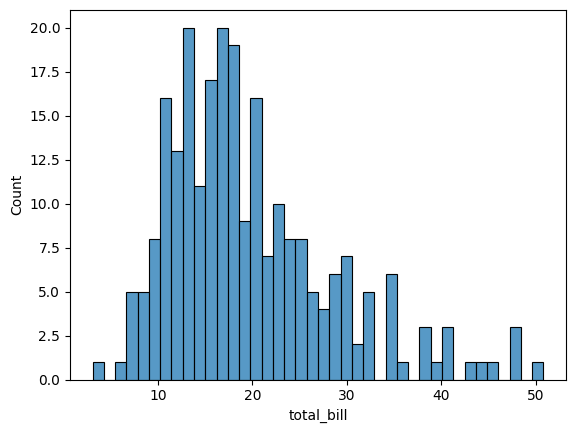

In [ ]:
sns.histplot(df['total_bill'],kde=False,bins=40)

## jointplot

The jointplot() function enables you to pair up two distplots for bivariate data, and you can choose the kind parameter to determine the type of comparison.

* “scatter”
* “reg”
* “resid”
* “kde”
* “hex”

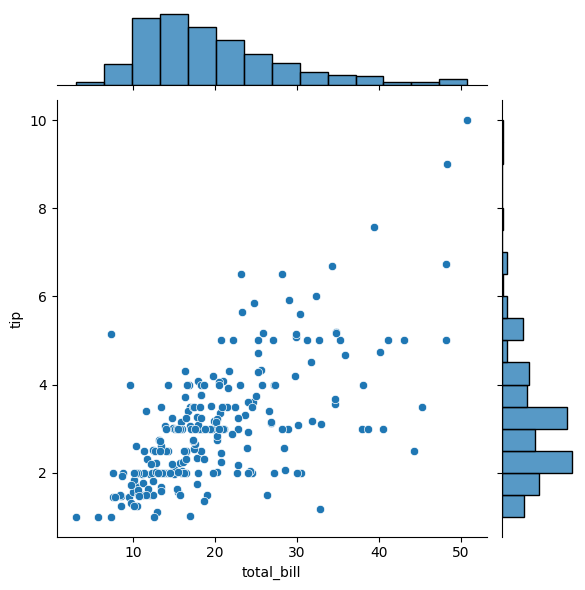

In [ ]:
sns.jointplot(x='total_bill',y='tip',data=df,kind='scatter')

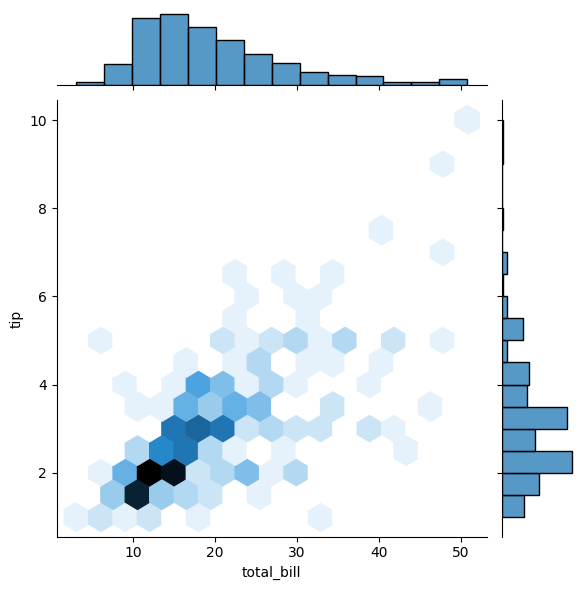

In [ ]:
sns.jointplot(x='total_bill',y='tip',data=df,kind='hex')

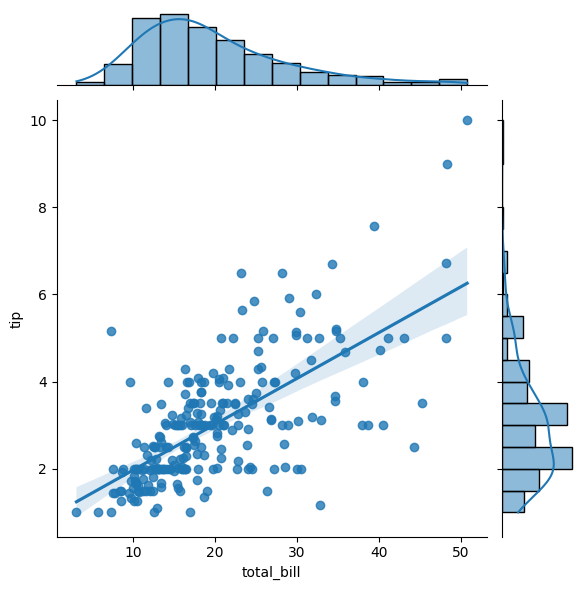

In [ ]:
sns.jointplot(x='total_bill',y='tip',data=df,kind='reg')

## pairplot

The pairplot function visualizes relationships between pairs of variables in a complete dataframe, focusing on numerical columns. It also accommodates a color hue argument for categorical columns.

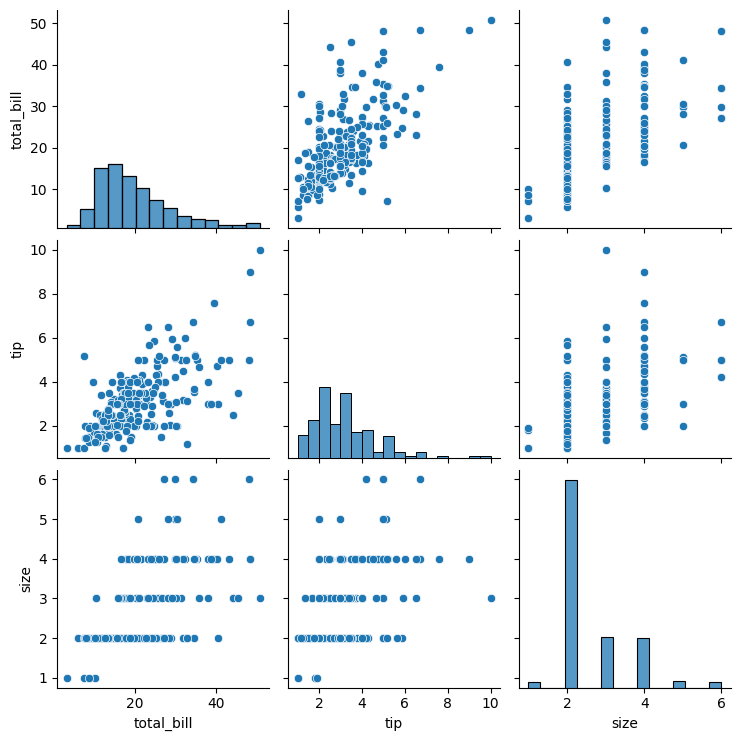

In [ ]:
sns.pairplot(df)

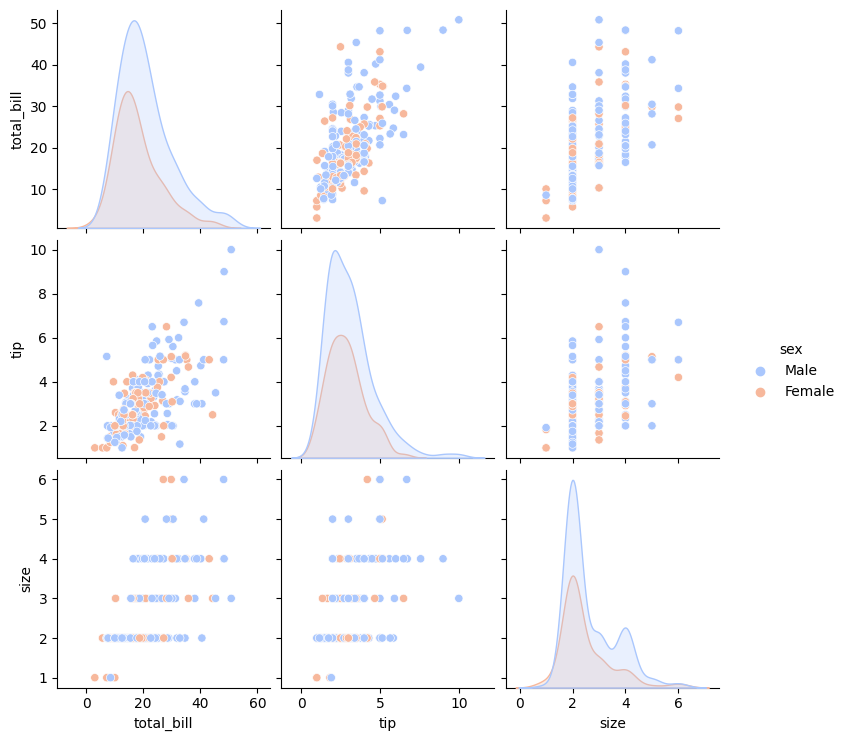

In [ ]:
sns.pairplot(df,hue='sex',palette='coolwarm')

## rugplot

Rugplots are a straightforward concept; they represent each point on a univariate distribution with a dash mark. They serve as the foundation for a KDE plot.

<Axes: xlabel='total_bill'>

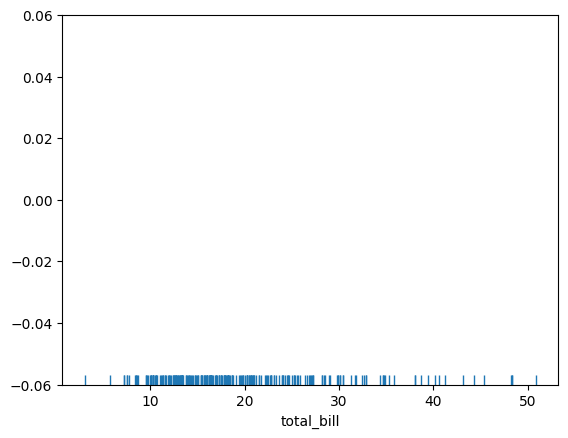

In [ ]:
sns.rugplot(df['total_bill'])

## kdeplot

KDE plots substitute each individual observation with a Gaussian (Normal) distribution centered around that specific value. For instance:

(0.0, 1.0)

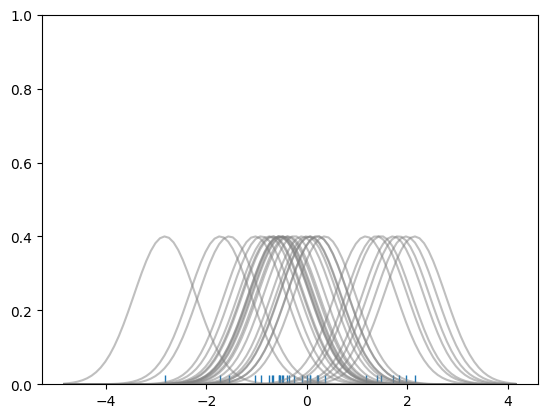

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Dataset
data = np.random.randn(30)

sns.rugplot(data);

# Set up the x-axis for the plot
x_min = data.min() - 2
x_max = data.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*data.std()**5)/(3*len(data)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in data:

    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)

    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

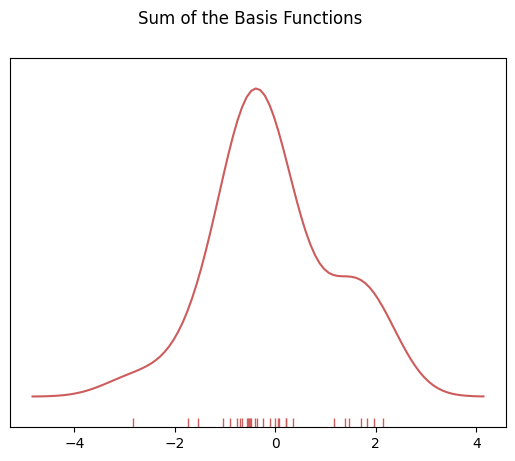

In [ ]:
# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(data,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<Axes: xlabel='total_bill', ylabel='Density'>

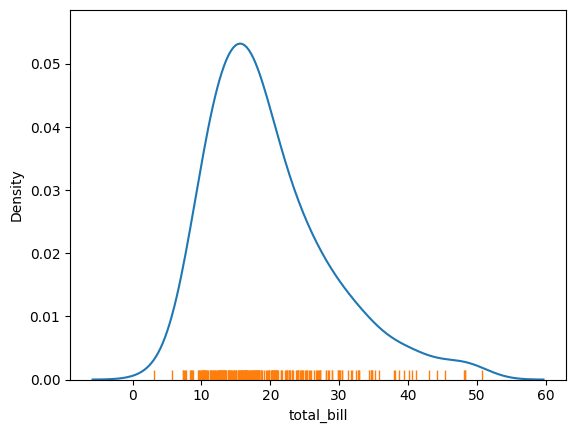

In [ ]:
sns.kdeplot(df['total_bill'])
sns.rugplot(df['total_bill'])

<Axes: xlabel='tip', ylabel='Density'>

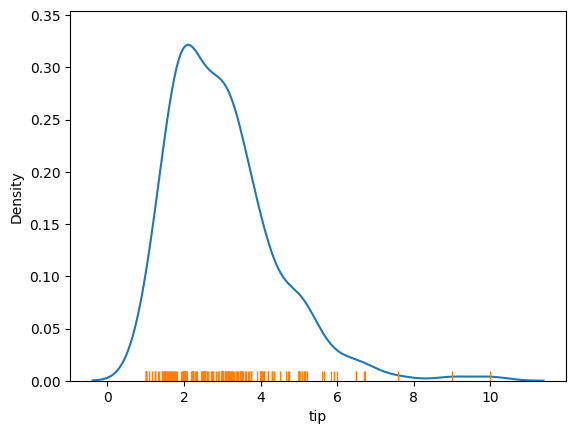

In [ ]:
sns.kdeplot(df['tip'])
sns.rugplot(df['tip'])